# Aviation Analysis

## Introduction
This project aims to analyze historical aviation incident data to identify low-risk aircraft models. By cleaning and preparing the data, we can perform various analyses to uncover trends and insights that will inform the company's decision-making process in purchasing and operating aircraft for commercial and private enterprises.

## Business Understanding
This company is expanding into the aviation industry to diversify its portfolio. The primary goal is to identify aircraft models with the lowest risk to ensure passenger and crew safety, minimize operational hazards, and reduce costs associated with incidents. Key business questions include:
1. Which aircraft models have the lowest injury rates?
2. Which phases of flight are associated with the highest injury risks?
3. How can we use historical data to make informed decisions on aircraft purchases?

## Data Understanding
### Source of Data
The data for this analysis was sourced from the National Transportation Safety Board (NTSB). The NTSB database includes detailed records of aviation incidents in the United States, providing comprehensive information on the circumstances of each incident, the aircraft involved, and the outcomes. This dataset is regularly updated and validated by aviation safety experts, ensuring reliable and accurate data for our analysis.
[Aviation Accident Database & Synopses](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses)

### Data Description
There are very many variables that were obtained from the dataset but there were a few chosen that would be key in this analysis.
The key variables include:
- **Incident Year**: The year the incident occurred.
- **Aircraft Make and Model**: The manufacturer and specific model of the aircraft involved.
- **Broad Phase of Flight**: The phase of flight during which the incident happened (e.g., takeoff, cruise, landing).
- **Injury Severity**: Classification of injuries (e.g., uninjured, minor, serious, fatal).
- **Total Injuries**: The total number of injuries reported in each incident.

## Data Preparation
We begin by loading the necessary libraries and the dataset, followed by a basic exploration of the data structure. This initial exploration helps us understand the data's dimensions, structure, and the presence of any missing or duplicate values.



In [38]:
#Import standard packages
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [3]:
#Load the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14380\1116962302.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


Basic information is displayed by using the type() function in order to know the structure of the data(whether it is a DataFrame or Series) as well as .info() to give general information of the dataset including whether or not it has missing values. This is potrayed under non-null count. If the non-null count doesnt  match the number of entries, then there are some missing values

In [4]:
#Displaying Basic information about the dataset
type(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

To display the rows of this data, we used .df.head() which will bring the first 5 rows by default. However, should the number of be specified, its output will be the called number. For example, df.head(7) will bring the first 7 rows.

In [5]:
#Display the first 5 rows of the dataset
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Next, we check for dupicated rows and  drop them if they exist, as they will be a hinderance to a having an accurate analysis. Dropping unnecessary columns will help simplify the data and ensure that we only Work with those columns relevant to our analysis.
To identify the duplicates, we will use .duplicated(), this will identify the duplicated columns. Moreover, using .value_counts() will give a summative value of the duplicated rows, with True being the  number of duplicates.

In [6]:
# Check for duplicate rows
df.duplicated().value_counts()

False    88889
Name: count, dtype: int64

In [7]:
# Identify the columns present and analyze which columns will be the best fit during analysis
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

df.shape is an attribute in pandas that returns the dimensions of a DataFrame. It provides a tuple containing two values, the number of rows and of columns respectively

In [8]:
#show the shape of the data frame
df.shape

(88889, 31)

In [9]:
""" 
The next step is to check for missing values as this is also 
an important indicator in our analysis in terms of whether we 
should keep a column or drop it due to the number of missing values present.
"""
df.isna().sum()# this function is used to identify the number of missing values and give the total number per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

We will drop several columns based on two primary reasons:

1) Some columns were not essential for our analysis and could be safely removed without losing valuable information. Examples of such columns include 'Investigation.Type', 'FAR.Description' and 'Country'.

2) Certain columns had over 50% missing values, making them unreliable and less useful for our analysis. These included columns like 'Latitude', 'Longitude', and 'Airport.Code'.

In [10]:
#Assign the list of columns to be removed to a variable
columns_to_drop = [
    'Investigation.Type', 'Accident.Number', 'Country', 
    'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 
    'Registration.Number', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 
    'Report.Status', 'Publication.Date'
]
df= df.drop(columns=columns_to_drop, errors='ignore')
#Use the drop function to remove those columns from the data set and ensure the change is permanent on the DataFrame

print(df.columns)

Index(['Event.Id', 'Event.Date', 'Location', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight'],
      dtype='object')


In [11]:
#Display the first 5 rows of the dataset
df.head(7)

,Event.Id,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,2.0,0.0,0.0,0.0,UNK,Cruise
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,4.0,0.0,0.0,0.0,UNK,Unknown
2,20061025X01555,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,NaN,3.0,NaN,NaN,NaN,IMC,Cruise
3,20001218X45448,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,2.0,0.0,0.0,0.0,IMC,Cruise
4,20041105X01764,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach
5,20170710X52551,1979-09-17,"BOSTON, MA",Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,NaN,NaN,1.0,44.0,VMC,Climb
6,20001218X45446,1981-08-01,"COTTON, MN",Fatal(4),Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,NaN,4.0,0.0,0.0,0.0,IMC,Unknown


In [12]:
#Assign the duplicated rows to a variable
duplicate_rows = df[df.duplicated()]
print(f"The total number of duplicate rows are {len(duplicate_rows)}")

The total number of duplicate rows are 32


In [13]:
#Use the drop function to remove those duplicates from the data set and ensure the change is permanent on the DataFrame
df = df.drop_duplicates()


In [14]:
#show the shape of the data frame and see whether the changes were reflected in the dataframe
df.shape

(88857, 18)

### Data Cleaning

We fill missing values in categorical columns with the mode and in measurable columns with the median. This step ensures that our dataset is complete and ready for analysis, with minimal bias introduced by missing data.

For categorical columns with missing values, we used the mode to fill them. This approach is effective because the mode represents the most common value in a column, ensuring that the missing values are filled with the most representative data without distorting the distribution

In [15]:
# List of categorical columns that need to have missing values filled
Categorized_columns=['Location', 'Injury.Severity', 'Aircraft.damage', 
                       'Make', 'Model', 'Amateur.Built', 'Broad.phase.of.flight',
                       'Engine.Type', 'Weather.Condition']
# Loop through each categorical column to find the mode
for column in Categorized_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)#Fill missing values in the current column with the mode



In [16]:
# When this function is called upon it sures that there are no missing vallues on all categorical columns

df.isna()

,Event.Id,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False
3,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
88885,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False
88886,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88887,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False


In [17]:
# Drop columns that were originally supposed to be dropped but were overlooked
Add_drop_columns = ['Aircraft.Category','FAR.Description']
df.drop(columns=Add_drop_columns, inplace=True)

For numerical columns with missing values, we will use the median to fill in the gaps. The median is less affected by outliers compared to the mean, making it a robust choice for ensuring the filled values do not skew the data.
We can make use of .apply() and the lambda function.

In [18]:
# Assign list of measurable columns that need to have missing values filled to a variable
Measurable_columns=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
# Fill missing values in each measurable column with the median value of that column
df[Measurable_columns]= df[Measurable_columns].apply(lambda x:x.fillna(x.median()),axis=0)

In [19]:
# Assert that there are no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88857 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88857 non-null  object 
 1   Event.Date              88857 non-null  object 
 2   Location                88857 non-null  object 
 3   Injury.Severity         88857 non-null  object 
 4   Aircraft.damage         88857 non-null  object 
 5   Make                    88857 non-null  object 
 6   Model                   88857 non-null  object 
 7   Amateur.Built           88857 non-null  object 
 8   Number.of.Engines       82776 non-null  float64
 9   Engine.Type             88857 non-null  object 
 10  Total.Fatal.Injuries    88857 non-null  float64
 11  Total.Serious.Injuries  88857 non-null  float64
 12  Total.Minor.Injuries    88857 non-null  float64
 13  Total.Uninjured         88857 non-null  float64
 14  Weather.Condition       88857 non-null  obj

In [20]:
# Imputing mode to this column as there was a slight overlook
mode1 = df['Number.of.Engines'].mode()[0]
df['Number.of.Engines'].fillna(mode1, inplace=True)

In [21]:
# Assert that there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88857 entries, 0 to 88888
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88857 non-null  object 
 1   Event.Date              88857 non-null  object 
 2   Location                88857 non-null  object 
 3   Injury.Severity         88857 non-null  object 
 4   Aircraft.damage         88857 non-null  object 
 5   Make                    88857 non-null  object 
 6   Model                   88857 non-null  object 
 7   Amateur.Built           88857 non-null  object 
 8   Number.of.Engines       88857 non-null  float64
 9   Engine.Type             88857 non-null  object 
 10  Total.Fatal.Injuries    88857 non-null  float64
 11  Total.Serious.Injuries  88857 non-null  float64
 12  Total.Minor.Injuries    88857 non-null  float64
 13  Total.Uninjured         88857 non-null  float64
 14  Weather.Condition       88857 non-null  obj

To improve readability, the column names will be cleaned up by replacing periods with spaces.

In [22]:
df.columns = df.columns.str.replace('.', ' ')
print(f'The current amount of columns and rows is {df.shape}')

The current amount of columns and rows is (88857, 16)


Additional columns are usually created in order to broaden the spectrum of the analysis. These new columns help us categorize and quantify the data more effectively, providing deeper insights into the incidents and their impacts. The additional colum to be created is the 'Total injuries' column, the 'Incident Year' and the 'Damage Scale' columns

In [23]:
#Create 'Total Injuries' column by adding the below colums and using the sum to create the new column
df['Total Injuries'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries']
# Extract 'Incident Year' from 'Event Date'
df['Incident Year'] = pd.to_datetime(df['Event Date']).dt.year
# Map 'Aircraft damage' to a damage scale
damage_levels = {
    'Unknown': 'Unknown',
    'Minor': 'Minor',
    'Substantial': 'Major',
    'Destroyed': 'Devastating'
}
df['Damage Scale'] = df['Aircraft damage'].map(damage_levels)
# Create 'Engine Count Category' and use lamda to make conditions
df['Engine Count Category'] = df['Number of Engines'].apply(lambda x: 'Single Engine' if x == 1 else 'Multi Engine')


In [24]:
# Display the first few rows of the updated dataset to confirm that the columns were created
df.head()

,Event Id,Event Date,Location,Injury Severity,Aircraft damage,Make,Model,Amateur Built,Number of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad phase of flight,Total Injuries,Incident Year,Damage Scale,Engine Count Category
0,20001218X45444,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,2.0,1948,Devastating,Single Engine
1,20001218X45447,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,4.0,1962,Devastating,Single Engine
2,20061025X01555,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Cessna,172M,No,1.0,Reciprocating,3.0,0.0,0.0,1.0,IMC,Cruise,3.0,1974,Devastating,Single Engine
3,20001218X45448,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,2.0,1977,Devastating,Single Engine
4,20041105X01764,1979-08-02,"Canton, OH",Fatal(1),Destroyed,Cessna,501,No,1.0,Reciprocating,1.0,2.0,0.0,0.0,VMC,Approach,3.0,1979,Devastating,Single Engine


Finally, the  cleaned dataset should be saved for further analysis.

In [52]:
#Saving the cleaned data set which will in turn be used for Data visualisation
df.to_csv('phase-1-aviation-project-2024-ES.csv', index=False)

## Visual Representation

### Analysis 1
This visualization created to illustrate historical trends and patterns in aviation incidents, aiding in understanding how injury rates have fluctuated over time. By plotting these data points on a line graph, we aim to identify any significant changes or recurring patterns, providing valuable insights for improving safety measures and operational practices within our aviation operations. 

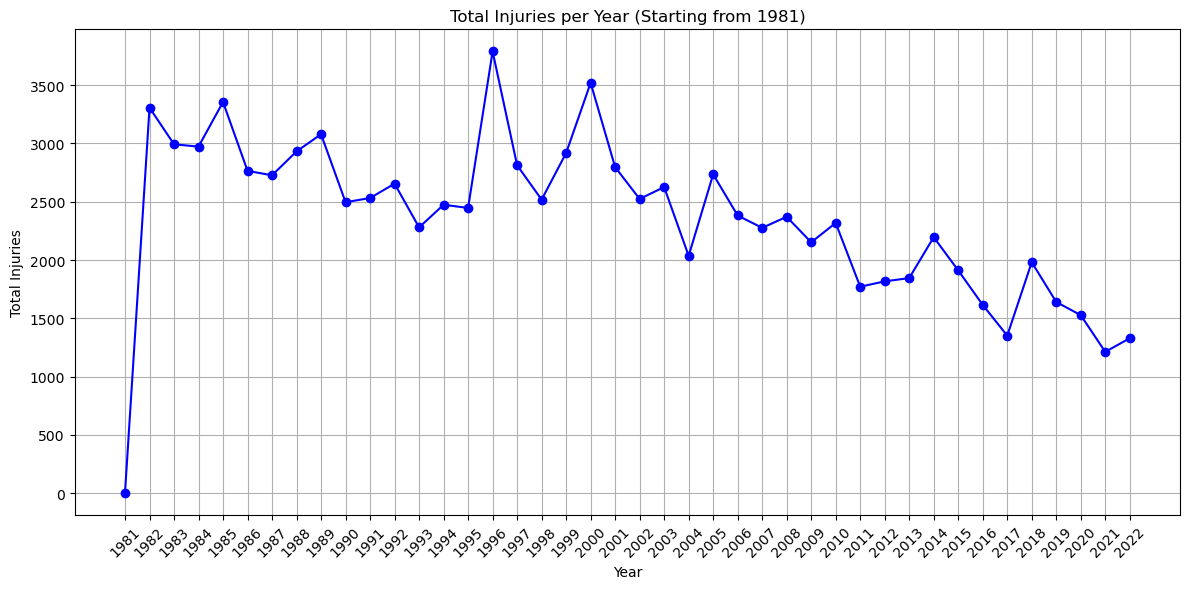

In [51]:

#Group the filtered data by 'Incident Year' and sum the 'Total Injuries' for each year
injuries_per_year = df_filtered.groupby('Incident Year')['Total Injuries'].sum()

# Plotting the total injuries per year as a line graph
plt.figure(figsize=(12, 6))
plt.plot(injuries_per_year.index, injuries_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Total Injuries per Year (Starting from 1981)')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(injuries_per_year.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Analysis 2
This bar chart depicting total injuries by broad phase of flight is designed to visualize the distribution of aviation incidents across different flight phases. It enables stakeholders to identify which phases pose higher risks and prioritize safety measures accordingly, aiming to mitigate injuries and enhance overall flight safety.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14380\2174320617.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Broad phase of flight', y='Total Injuries', data=df, estimator=sum, ci=None, palette='viridis')


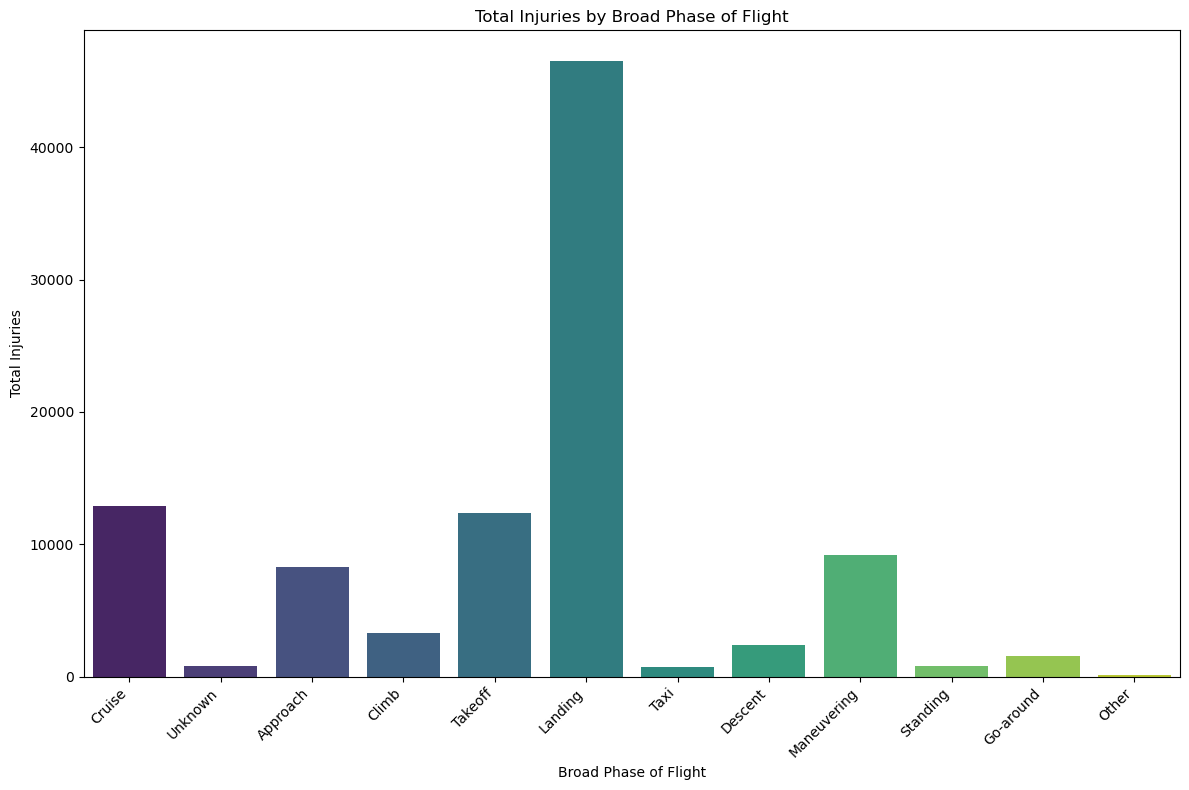

In [46]:
# Assuming df is your cleaned DataFrame with 'Broad phase of flight' and 'Total Injuries' columns
plt.figure(figsize=(12, 8))
sns.barplot(x='Broad phase of flight', y='Total Injuries', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Injuries by Broad Phase of Flight')
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Analysis 3
This data is essential for making informed decisions about fleet management and safety protocols within the aviation industry. By identifying models with a track record of low injury rates despite incidents, stakeholders can prioritize these aircraft for operational use, thereby reducing overall risk and enhancing safety standards. This approach not only improves passenger safety but also informs regulatory policies and operational guidelines to mitigate risks effectively

![Airplane Make with Highest Number of Total Uninjured  and Total Injuries](https://raw.githubusercontent.com/ElsieSerem/phase-1-aviation-project-2024-ES/main/images/Airplane%20Make%20with%20Highest%20Number%20of%20Total%20Uninjured%20%20and%20Total%20Injuries.png)


## Summary of findings
### Total Injuries per Year 

Data from multiple years was collected and summed up the total the number of injuries for each year. A line graph was utilized to show the trends of total injuries over the years.

**Key findings:** The visualization shows fluctuations in total injuries over the years, highlighting years with significant spikes. The fluctuations were potentially caused by periods of increased risk, potentially correlating with industry changes, regulatory updates, or other external factors.

### Total Injuries by Broad Phase of Flight 

Grouped incident data by the broad phase of flight (e.g., takeoff, cruise, landing). This was portrayed by a bar chart representing the number of injuries in each flight phase.

**Key findings:** The phase with the highest number of injuries that was identified was the landing phase which leaves a distinctive large gap from the cruising phase which has the second highest number of injuries.

### Airplane Make with Highest Number of Uninjured and Total Injuries 

This data was used to identify the airplane makes with the highest number of uninjured individuals. A dual-axis bar chart showing the number of uninjured and total injuries for top airplane makes was created to portray this information.

**Key Findings:** It is important to ascertain which airplane models to consider for purchase which means we choose the airplane make with the highest number of uninjured and low total injuries from the incident.

An Aircraft Safety Analysis Dashboard was also created for further analysis. This somewhat general tool was meant to enable a great deal of insight Visualization into the historical aviation incident data for insights on aviation incidents easily. Like this interactive dashboard would enable stakeholders to explore trends, identify most unsafe parts of the flight, and compare how various aircraft models are rated in terms of their safety features. [Interactive Dasboard](https://public.tableau.com/app/profile/elsie.serem/viz/AviationAnalysis_17185612532730/Dashboard1)

## Conclusion and Recommendations
Through our analysis, we have come up with the following recommendations:

**Prioritize Safety:** Aircraft models with consistently low injury rates should be prioritized for purchase. Historical data shows that certain models have a strong safety record, minimizing operational risks.

**Enhance Training:** Flight phases such as takeoff and landing are associated with higher injury rates. Developing targeted training programs for these phases can significantly improve overall flight safety.

**Continuous Monitoring:** Implementing a continuous monitoring system to track safety metrics and adapt to evolving industry standards is crucial. This approach ensures that safety measures remain up-to-date and effective in mitigating risks.

By addressing these areas, our company can make informed decisions to ensure the highest standards of safety in our new aviation operations. It is particularly important to note that there has been a significant drop in aircraft incidents, and by relation total number of injuries in the last 5 years. This shows that, aviation is indeed a lucrative business venture that can generate profits for the company as long as the company takes appropriate measures to ensure the overall saftety of all stake holders involved.